<a href="https://colab.research.google.com/github/SebastianCM020/Grupo1_Sistemas_Informacion/blob/main/7319_ETL_SRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Version_CACE_7315 - DataSet.csv to Version_CACE_7315 - DataSet (1).csv


In [ ]:
import pandas as pd

# Use the uploaded file instead of the local path
file_name = "Version_CACE_7315 - DataSet.csv"
df = pd.read_csv(file_name)
display(df.head())

,Region,País,Año,%_Presion,Tipo_Presion
0,Europa,Alemania,2004,1.384,Contribuciones a la Seguridad Social
1,Europa,Alemania,2004,1.020,Presión Tributaria Gobierno Subnacional
2,Europa,Alemania,2004,1.015,Presión Tributaria Gobierno Central
3,Europa,Alemania,2004,3.419,Presión Fiscal Total
4,America Latina,Argentina,2004,2.433,Presión Fiscal Total


Extraer todos los datos del sri

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página del SRI
url = "https://www.sri.gob.ec/datasets#Presi%C3%B3n%20Fiscal"

# Realizamos la petición HTTP
response = requests.get(url)
response.raise_for_status()  # Verifica si hay errores

# Parseamos el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Buscamos el enlace del CSV
enlace = None
for link in soup.find_all('a', href=True):
    if "presion_fiscal.csv" in link['href'].lower():
        enlace = link['href']
        break

if enlace:
    print(f"Enlace encontrado: {enlace}")
else:
    print("No se encontró el enlace de descarga.")

Enlace encontrado: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv


Descargamos el archivo con el nombre SRI_Precion_Fiscal.csv

In [2]:
import requests

url = enlace
nombre_archivo = "SRI_Presion_Fiscal.csv"

response = requests.get(url)

# Guardar el archivo
with open(nombre_archivo, 'wb') as f:
    f.write(response.content)

print("✅ Archivo descargado:", nombre_archivo)

✅ Archivo descargado: SRI_Presion_Fiscal.csv


En este bloque estoy pasandole la informacion del CSV a un DataFrame

In [3]:
import pandas as pd

# 1. Leer el archivo CSV con codificación y separador correctos
df = pd.read_csv("SRI_Presion_Fiscal.csv", encoding='latin1', sep=';')

# 2. Eliminar espacios en los nombres de columnas
df.columns = df.columns.str.strip()

# 3. Renombrar la columna '%_Presion' a 'Presion' para facilitar el análisis
df.rename(columns={'%_Presion': 'Presion'}, inplace=True)

# 4. Eliminar espacios dentro de la columna 'Presion' y convertir a número
df['Presion'] = df['Presion'].astype(str).str.replace(' ', '').str.replace(',', '.')
df['Presion'] = pd.to_numeric(df['Presion'], errors='coerce')

# 5. Verificar si hay valores nulos
print("🧼 Valores nulos por columna:")
print(df.isnull().sum())

# 6. Eliminar filas con valores nulos en columnas críticas (opcional)
df.dropna(subset=['Region', 'País', 'Año', 'Presion'], inplace=True)

# 7. Convertir la columna Año a entero (por si acaso no lo es)
df['Año'] = pd.to_numeric(df['Año'], errors='coerce').astype('Int64')

# 8. Mostrar las primeras filas limpias
print("\n✅ Datos limpios:")
print(df.head())

# 9. Estadísticas generales
print("\n📊 Estadísticas de la columna Presion:")
print(df['Presion'].describe())


🧼 Valores nulos por columna:
Region          0
País            0
Año             0
Presion         0
Tipo_Presion    0
dtype: int64

✅ Datos limpios:
           Region       País   Año  Presion          Tipo_Presion
0  America Latina  Argentina  2004   0.2433  Presión Fiscal Total
1  America Latina  Argentina  2005   0.2453  Presión Fiscal Total
2  America Latina  Argentina  2006   0.2508  Presión Fiscal Total
3  America Latina  Argentina  2007   0.2637  Presión Fiscal Total
4  America Latina  Argentina  2008   0.2762  Presión Fiscal Total

📊 Estadísticas de la columna Presion:
count    3043.000000
mean        0.147562
std         0.123430
min         0.000000
25%         0.035100
50%         0.128300
75%         0.226550
max         0.502900
Name: Presion, dtype: float64


Analisi estadistico descriptivo

In [4]:
from scipy import stats

print("\n📌 Media (promedio) de la presión fiscal:")
print(df['Presion'].mean())

print("\n📌 Mediana de la presión fiscal:")
print(df['Presion'].median())

print("\n📌 Moda de la presión fiscal:")
moda = df['Presion'].mode()
print(moda if not moda.empty else "No hay moda clara")

print("\n📌 Varianza de la presión fiscal:")
print(df['Presion'].var())

print("\n📌 Desviación estándar:")
print(df['Presion'].std())

print("\n📌 Valor mínimo y máximo:")
print("Mínimo:", df['Presion'].min())
print("Máximo:", df['Presion'].max())



📌 Media (promedio) de la presión fiscal:
0.14756243838317448

📌 Mediana de la presión fiscal:
0.1283

📌 Moda de la presión fiscal:
0    0.0
Name: Presion, dtype: float64

📌 Varianza de la presión fiscal:
0.015235037224427093

📌 Desviación estándar:
0.12343029297715814

📌 Valor mínimo y máximo:
Mínimo: 0.0
Máximo: 0.5029


1. País con mayor presión fiscal promedio (históricamente)

In [5]:
print("\n🏆 País con mayor presión fiscal promedio:")
promedios = df.groupby('País')['Presion'].mean().sort_values(ascending=False)
print(promedios.head(1))



🏆 País con mayor presión fiscal promedio:
País
Dinamarca    0.228434
Name: Presion, dtype: float64


In [6]:
print("\n🔝 Top 5 países con mayor presión fiscal promedio:")
print(promedios.head(5))



🔝 Top 5 países con mayor presión fiscal promedio:
País
Dinamarca    0.228434
Francia      0.220238
Suecia       0.216976
Bélgica      0.215012
Finlandia    0.210920
Name: Presion, dtype: float64


Evolución de presión fiscal de un país específico

In [7]:
pais = 'Ecuador'  # cambia por el país que quieras
df_pais = df[df['País'] == pais]

print(f"\n📈 Evolución de presión fiscal en {pais}:")
print(df_pais[['Año', 'Presion']].sort_values('Año'))


📈 Evolución de presión fiscal en Ecuador:
       Año  Presion
95    2004   0.1450
400   2004   0.1081
1010  2004   0.0291
705   2004   0.0078
706   2005   0.0077
...    ...      ...
418   2022   0.1367
724   2023   0.0108
419   2023   0.1316
114   2023   0.1934
1029  2023   0.0509

[80 rows x 2 columns]


Año con mayor presión fiscal en todo el conjunto

In [8]:
fila_max = df[df['Presion'] == df['Presion'].max()]
print("\n📌 Año y país con mayor presión fiscal registrada:")
print(fila_max[['País', 'Año', 'Presion']])


📌 Año y país con mayor presión fiscal registrada:
          País   Año  Presion
2808  Islandia  2016   0.5029


Gráfico comparativo de países (opcional)

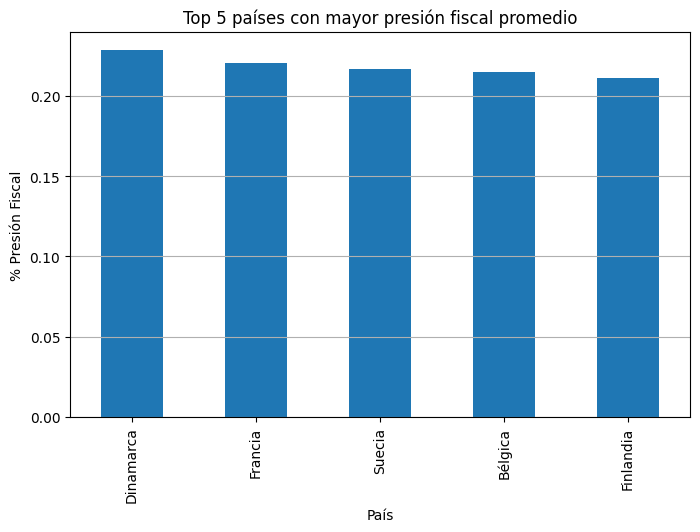

In [9]:
import matplotlib.pyplot as plt

top5 = promedios.head(5)

top5.plot(kind='bar', figsize=(8,5), title='Top 5 países con mayor presión fiscal promedio')
plt.ylabel('% Presión Fiscal')
plt.xlabel('País')
plt.grid(axis='y')
plt.show()

Evolución histórica de la presión fiscal promedio en América Latina

/tmp/ipython-input-10-2800615395.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


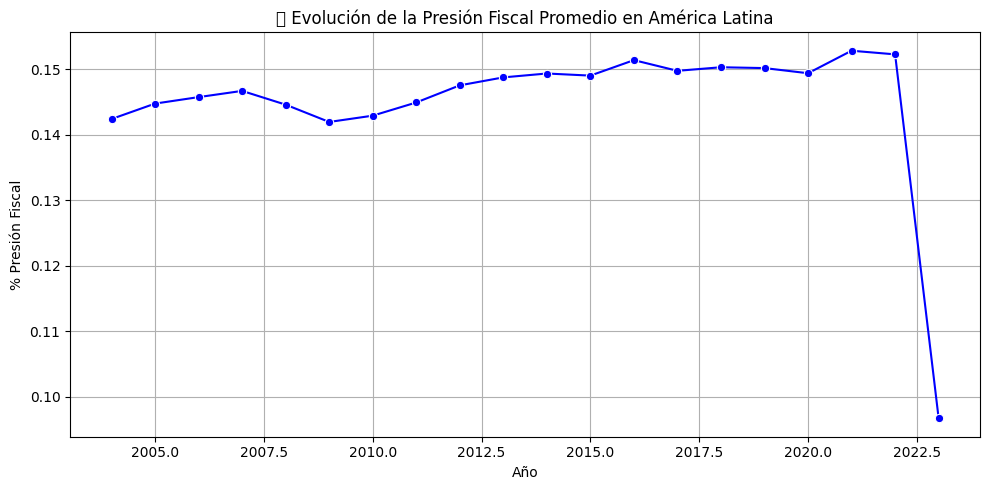

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por año y obtener promedio de la región
promedio_anual = df.groupby('Año')['Presion'].mean().reset_index()

# Gráfico de línea
plt.figure(figsize=(10,5))
sns.lineplot(data=promedio_anual, x='Año', y='Presion', marker='o', color='blue')
plt.title('📈 Evolución de la Presión Fiscal Promedio en América Latina')
plt.xlabel('Año')
plt.ylabel('% Presión Fiscal')
plt.grid(True)
plt.tight_layout()
plt.show()


Comparación entre países en el año más reciente

/tmp/ipython-input-11-704761544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ultimo, y='País', x='Presion', palette='viridis')
/tmp/ipython-input-11-704761544.py:15: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


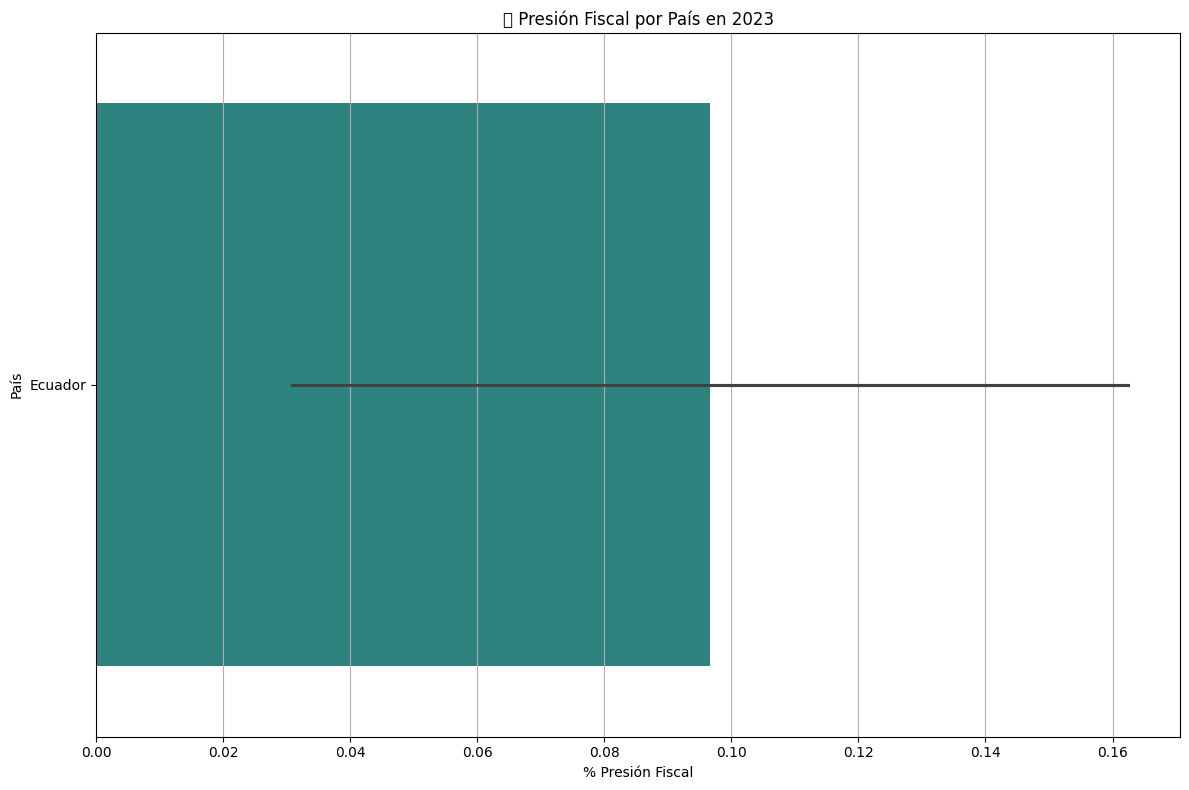

In [11]:
# Filtrar el último año del dataset
ultimo_anio = df['Año'].max()
df_ultimo = df[df['Año'] == ultimo_anio]

# Ordenar por presión fiscal
df_ultimo = df_ultimo.sort_values('Presion', ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(12,8))
sns.barplot(data=df_ultimo, y='País', x='Presion', palette='viridis')
plt.title(f'🏅 Presión Fiscal por País en {ultimo_anio}')
plt.xlabel('% Presión Fiscal')
plt.ylabel('País')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Distribución de la presión fiscal por país (boxplot)

/tmp/ipython-input-12-2400519310.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


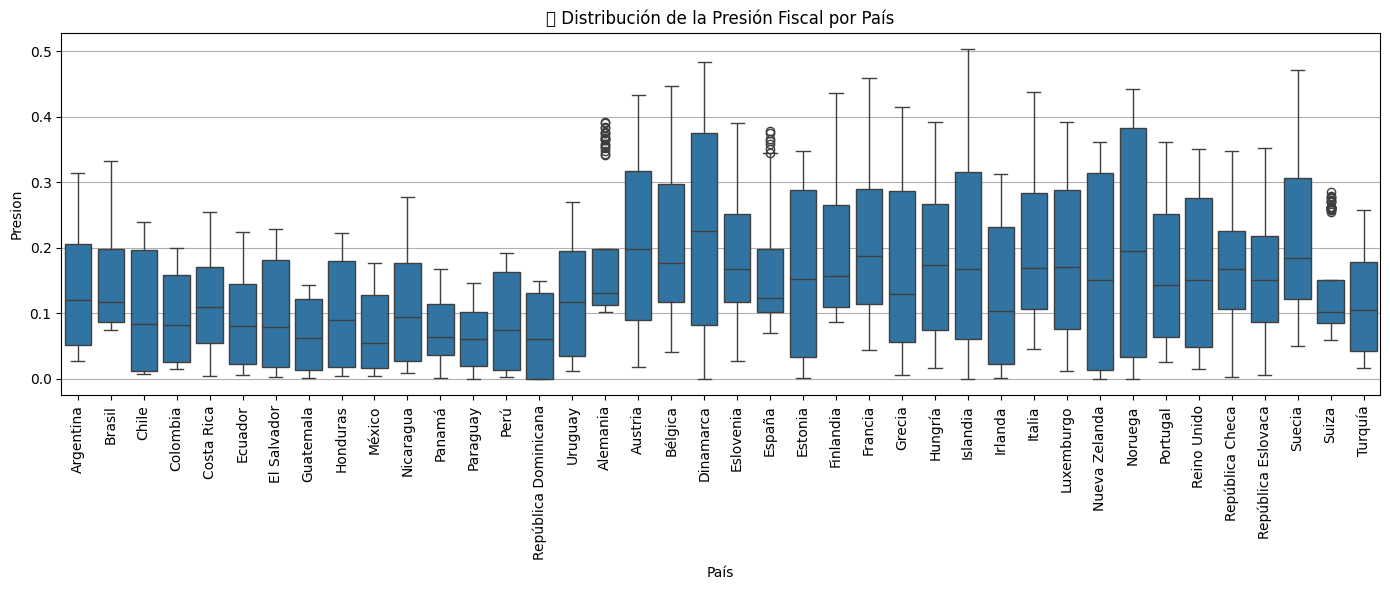

In [12]:
# Seleccionar países con suficientes registros (por ejemplo, +5 años)
conteos = df['País'].value_counts()
paises_mas_estables = conteos[conteos >= 5].index
df_filtrado = df[df['País'].isin(paises_mas_estables)]

# Gráfico de caja por país
plt.figure(figsize=(14,6))
sns.boxplot(data=df_filtrado, x='País', y='Presion')
plt.title('📦 Distribución de la Presión Fiscal por País')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Consumo Extraccion de los datos utilizando la API de OECD

Referencia

https://data-explorer.oecd.org/vis?tm=ecuador&pg=0&snb=157&vw=br&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_REV_LAC%40DF_REVECU&df[ag]=OECD.CTP.TPS&df[vs]=2.0&dq=..S13....A&lom=LASTNPERIODS&lo=10&to[TIME_PERIOD]=false

In [13]:
# URL de la API OECD con datos
url = "https://sdmx.oecd.org/public/rest/data/OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0/..S13....A?startPeriod=2014&dimensionAtObservation=AllDimensions"

# Cabeceras para solicitar formato JSON
headers = {
    "Accept": "application/vnd.sdmx.data+json;version=1.0.0-wd"
}

# Hacer la petición
response = requests.get(url, headers=headers)
response.raise_for_status()  # lanzar error si algo sale mal

# Cargar respuesta como JSON
data = response.json()


Extraer los datos JSON a un DataFrame

In [14]:
# Lista para almacenar los resultados
filas = []

# Identificadores de dimensión (pueden cambiar según el conjunto)
observaciones = data['data']['dataSets'][0]['observations']
series_keys = data['data']['structure']['dimensions']['observation']

# Construir la estructura
for key, value in observaciones.items():
    indices = key.split(":")
    fila = {}
    for i, dim in enumerate(series_keys):
        codigos = dim['values']
        idx = int(indices[i])
        fila[dim['id']] = codigos[idx]['name']
    fila['value'] = value[0]
    filas.append(fila)

# Convertir a DataFrame
df = pd.DataFrame(filas)

# Ver los primeros datos
print(df.head())

df.describe()

  REF_AREA      MEASURE              SECTOR  \
0  Ecuador  Tax revenue  General government   
1  Ecuador  Tax revenue  General government   
2  Ecuador  Tax revenue  General government   
3  Ecuador  Tax revenue  General government   
4  Ecuador  Tax revenue  General government   

                                    STANDARD_REVENUE CTRY_SPECIFIC_REVENUE  \
0  Taxes on income, profits and capital gains of ...                 Total   
1  Taxes on production, sale, transfer, leasing a...                 Total   
2  Taxes on income, profits and capital gains of ...                 Total   
3                                   Taxes on exports                 Total   
4  Unallocable between taxes on production, sale,...                 Total   

  UNIT_MEASURE    FREQ TIME_PERIOD      value  
0    US dollar  Annual        2022    181.433  
1    US dollar  Annual        2022  11585.590  
2    US dollar  Annual        2022   5315.011  
3    US dollar  Annual        2014      0.000  
4    US 

,value
count,988.000000
mean,1030.535866
std,2891.862838
min,-346.902000
25%,0.000000
50%,34.528000
75%,336.843250
max,24471.534000


In [16]:
# Alternativa directa desde stats.oecd.org
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 1. Definir la URL y hacer la solicitud
url = "https://stats.oecd.org/SDMX-JSON/data/REV_LAC/ECU.S1+S13.A/all?startTime=1990&endTime=2023"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Lanza excepción para códigos 4XX/5XX

    if response.status_code == 200:
        data = response.json()

        # 2. Procesamiento de datos
        # Extraer observaciones
        observations = data['dataSets'][0]['observations']

        # Extraer dimensiones y metadatos
        structure = data['structure']
        dimensions = structure['dimensions']['observation']

        # Mapear códigos a nombres legibles
        tax_categories = {
            '0': 'Impuestos sobre ingresos (S1)',
            '1': 'Impuestos sobre bienes/servicios (S13)'
        }

        # Obtener lista de años
        time_dim = next(d for d in dimensions if d['id'] == 'TIME_PERIOD')
        years = [item['name'] for item in time_dim['values']]

        # 3. Crear DataFrame
        records = []
        for obs_key, obs_value in observations.items():
            # El formato de la clave es normalmente "0:0:0" para [posición país, posición categoría, posición año]
            parts = obs_key.split(':')
            tax_index = parts[1]  # Índice de categoría fiscal
            year_index = int(parts[2])  # Índice del año

            records.append({
                'Año': years[year_index],
                'Categoría': tax_categories[tax_index],
                'Valor (% PIB)': obs_value[0]
            })

        df = pd.DataFrame(records)

        # 4. Limpieza y conversión de tipos
        df['Año'] = pd.to_numeric(df['Año'])
        df['Valor (% PIB)'] = pd.to_numeric(df['Valor (% PIB)'])
        df = df.sort_values('Año')

        # 5. Visualización
        plt.figure(figsize=(14, 7))
        sns.lineplot(
            data=df,
            x='Año',
            y='Valor (% PIB)',
            hue='Categoría',
            marker='o',
            linewidth=2.5
        )

        plt.title('Evolución de los Ingresos Tributarios en Ecuador (1990-2023)\n% del PIB',
                 fontsize=16, pad=20)
        plt.xlabel('Año', fontsize=12)
        plt.ylabel('% del PIB', fontsize=12)
        plt.legend(title='Tipo de Impuesto', title_fontsize=12, fontsize=11)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Mostrar valores en los marcadores cada 5 años
        for categoria in df['Categoría'].unique():
            subset = df[df['Categoría'] == categoria]
            for i, row in subset.iterrows():
                if row['Año'] % 5 == 0:  # Cada 5 años
                    plt.text(row['Año'], row['Valor (% PIB)'],
                            f"{row['Valor (% PIB)']:.1f}%",
                            ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        # 6. Mostrar tabla resumen
        print("\nResumen de datos:")
        print(df.pivot_table(index='Año', columns='Categoría', values='Valor (% PIB)'))

except requests.exceptions.RequestException as e:
    print(f"Error de conexión: {str(e)}")
except ValueError as e:
    print(f"Error procesando JSON: {str(e)}")
    print("Respuesta del servidor:", response.text[:500])  # Mostrar parte de la respuesta para diagnóstico
except KeyError as e:
    print(f"Estructura de datos inesperada. Falta clave: {str(e)}")
    print("Revisa la estructura completa con: print(data.keys())")
except Exception as e:
    print(f"Error inesperado: {str(e)}")

Error de conexión: 404 Client Error: Not Found for url: https://stats.oecd.org/SDMX-JSON/data/REV_LAC/ECU.S1+S13.A/all?startTime=1990&endTime=2023
